# PUI2016 HW6 Assignment 1 - vsg247

In [122]:
from __future__ import print_function, division
from pandas.tools.plotting import scatter_matrix
import geopandas as gp
import pandas as pd
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [86]:
### A function to download the data in case it's not there yet. 

def get_LL84_csv(filename):
    '''
    Function that get the data file from the NYC Open Data websites and saves it in the PUIdata directory.
    If the file is already there, the function prints a message saying that. 
    '''
    
    print('Getting the data from NYC Open Data website')
    
    ### First check if the csv file is not already at the directory
    if os.path.isfile(os.getenv("PUIDATA") + "/" + filename):
        print ("File was already at the PUIdata directory.")
         
    else :
        # Download the File; move it to the PUIdata directory.
        print ("Downloading")
        
        # Downloading the File
        os.system("curl -O https://data.cityofnewyork.us/resource/" + filename)
        print ("File downloaded.")
        
        # Moving it to the PUIdata directory
        os.system("mv " + filename + " " + os.getenv("PUIDATA"))
        
                  
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + filename):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("File in place, you can continue.")

In [87]:
def get_MapPluto_shp(foldername, filename):
    '''
    Function that get the data file from the Pluto/MapPluto website and saves it in the PUIdata directory.
    If the file is already there, the function prints a message saying that.
    If the zipped folder was already there just unzips the folder
    '''
    
    print('Getting the data from Pluto/MapPluto website')
    
    ### First check if the shp file is not already at the directory
    if os.path.isfile(os.getenv("PUIDATA") + "/" + foldername + "/" + filename):
        print ("SHP File was already at the PUIdata directory.")
        
    # If the SHP is not there, now check if the ZIP File is already there.
    # If the ZIP File is there, unzip it and save the unzipped folder to the PUIdata directory
    elif os.path.isfile(os.getenv("PUIDATA") + "/" + foldername + ".zip"):
            print('ZIP File was already at the PUIdata directory.')
            
            # unzip the folder andsave it to the PUIdata  directory
            os.system("unzip " + os.getenv("PUIDATA") + "/" + foldername + ".zip -d" + os.getenv("PUIDATA") + "/" + foldername)
            print(foldername + ' unzipped.')
                               
    else :
        # Download the File; move it to the PUIdata directory.
        print ("Downloading")
        
        #os.system("cd " + os.getenv("PUIDATA"))
        
        # Downloading the ZIP File
        os.system("curl -O https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/" + foldername + '.zip')
        print ("Zipped folder downloaded.")
        
        # Moving it to the PUIdata directory
        os.system("mv " + foldername + ".zip" + " " + os.getenv("PUIDATA"))
        
        # unzip the folder and create a folder called 'foldername' in the PUIdata directory with the unzipped files
        os.system("unzip " + os.getenv("PUIDATA") + "/" + foldername + ".zip -d" + os.getenv("PUIDATA") + "/" + foldername)
        
                         
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + foldername + "/" + filename):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("File in place, you can continue.\n")

In [88]:
get_LL84_csv('m46j-75iy.csv')

Getting the data from NYC Open Data website
File was already at the PUIdata directory.
File in place, you can continue.


In [89]:
get_MapPluto_shp('mn_mappluto_16v1', 'MNMapPLUTO.shp')

Getting the data from Pluto/MapPluto website
SHP File was already at the PUIdata directory.
File in place, you can continue.



In [90]:
#read the energy data into a data frame
nrg = pd.read_csv(os.getenv("PUIDATA")+ "/" + 'm46j-75iy.csv')

In [91]:
#read the MapPLUTO data into a geo data frame
bsize = gp.read_file(os.getenv("PUIDATA")+ "/" + 'mn_mappluto_16v1/MNMapPLUTO.shp')

In [92]:
# checking the columns in the data frame
nrg.columns

Index([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'nyc_borough_block_and_lot_bbl',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_property_floor_area_building_s_ft', u'reported_water_method',
       u'site_eui_kbtu_ft2', u'source_eui_kbtu_ft2', u'street_name',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'],
      dtype='object')

In [93]:
# getting rid of the columns I don't need

nrg.drop([u'automatic_water_benchmarking_eligible', u'bbls_co_reported',
       u'borough', u'co_reported_bbl_status', u'direct_ghg_emissions_mtco2e',
       u'dof_benchmarking_submission_status', u'dof_number_of_buildings',
       u'energy_star_score', u'indirect_ghg_emissions_mtco2e',
       u'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       u'primary_property_type_self_selected', u'record_number',
       u'reported_nyc_building_identificaiton_numbers_bins',
       u'reported_water_method', u'source_eui_kbtu_ft2',
       u'street_name', u'dof_property_floor_area_buildngs_and_parking_ft2',
       u'street_number', u'total_ghg_emissions_mtco2e',
       u'weather_normalized_site_eui_kbtu_ft2',
       u'weather_normalized_source_eui_kbtu_ft2', u'zip_code'], axis = 1, inplace = True)

nrg.head()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2
0,1.000410e+09,918919,NaN
1,4.021460e+09,NaN,NaN
2,2.027620e+09,64200,NaN
3,1.006700e+09,NaN,NaN
4,2.048300e+09,50000,NaN


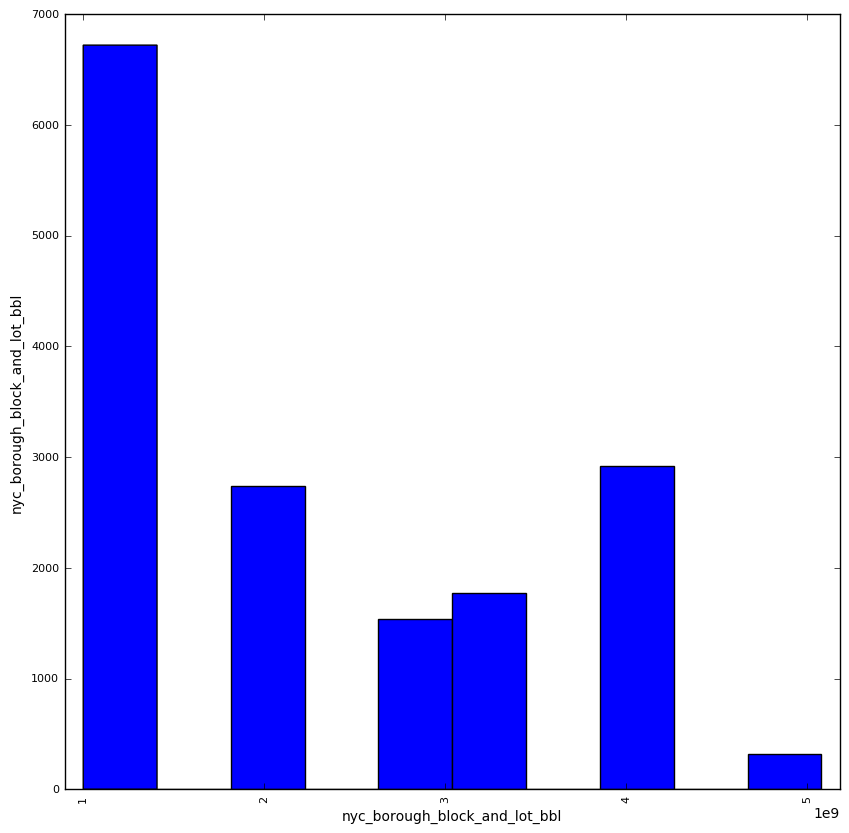

In [94]:
# Checking a scatter plot of nrg 
# Only the BBL was plotted
scatter_matrix(nrg, s=300, figsize=(10, 10))
pl.show()

#### Figure 1: scatter matrix of all numerical values plots only the BBL numbers.

In [95]:
# Coercing the area and energy consumption columns to numeric values and droping rows with NaN
nrg.reported_property_floor_area_building_s_ft = pd.to_numeric(nrg.reported_property_floor_area_building_s_ft, errors = 'coerce')
nrg.site_eui_kbtu_ft2 = pd.to_numeric(nrg.site_eui_kbtu_ft2, errors = 'coerce')
nrg.dropna(inplace=True)
nrg.describe()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2
count,1.145700e+04,1.145700e+04,1.145700e+04
mean,2.168725e+09,1.691948e+05,3.059105e+03
std,1.227232e+09,3.071923e+05,2.652284e+05
min,1.000048e+09,5.000000e+02,0.000000e+00
25%,1.012880e+09,6.568800e+04,6.520000e+01
50%,2.028430e+09,9.408000e+04,8.410000e+01
75%,3.063150e+09,1.627910e+05,1.061000e+02
max,5.075110e+09,1.421712e+07,2.822601e+07


In [96]:
# calculating total energy consumption
nrg['tot_nrg'] = nrg.reported_property_floor_area_building_s_ft * nrg.site_eui_kbtu_ft2
nrg.describe()

,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,tot_nrg
count,1.145700e+04,1.145700e+04,1.145700e+04,1.145700e+04
mean,2.168725e+09,1.691948e+05,3.059105e+03,7.701128e+08
std,1.227232e+09,3.071923e+05,2.652284e+05,7.124361e+10
min,1.000048e+09,5.000000e+02,0.000000e+00,0.000000e+00
25%,1.012880e+09,6.568800e+04,6.520000e+01,5.185837e+06
50%,2.028430e+09,9.408000e+04,8.410000e+01,7.761875e+06
75%,3.063150e+09,1.627910e+05,1.061000e+02,1.395426e+07
max,5.075110e+09,1.421712e+07,2.822601e+07,7.616648e+12


In [97]:
# removing outliers and points that could be jeopardize the analysis 
nrg = nrg[nrg.tot_nrg > 0]
#nrg = nrg[nrg.tot_nrg < (nrg.tot_nrg.mean() + 2*nrg.tot_nrg.std())]

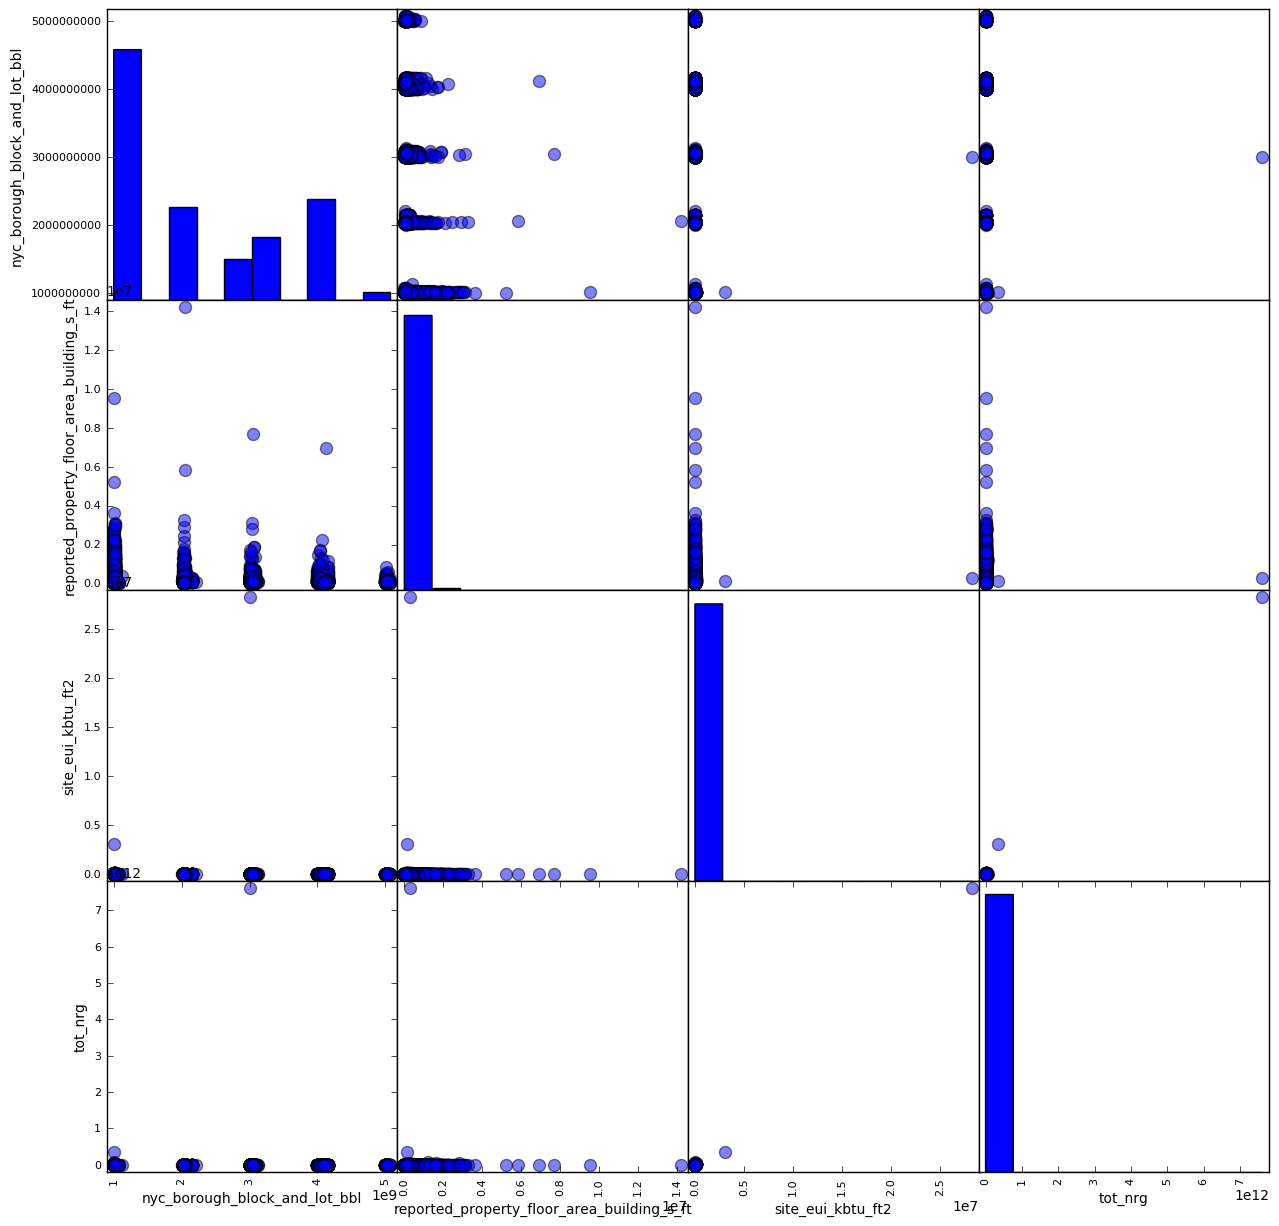

In [98]:
# plotting again the matrix scatter, now all columns are plotted.
scatter_matrix(nrg, s=300, figsize=(15, 15))
pl.show()

#### Figure 2: scatter matrix of nrg data frame now plots all columns.

In [99]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [100]:
bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
        u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   
       u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea',    u'SPDist1', u'SHAPE_Area', u'SHAPE_Leng',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',  
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap', u'geometry'  ], axis = 1, inplace = True)

bsize.head()

,BBL,BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal
0,1.015450e+09,10885,1,5.0,16,18
1,1.007238e+09,89203,1,11.0,50,50
2,1.016800e+09,12000,1,5.0,10,10
3,1.013850e+09,203490,1,17.0,29,32
4,1.011970e+09,13839,1,5.0,26,26


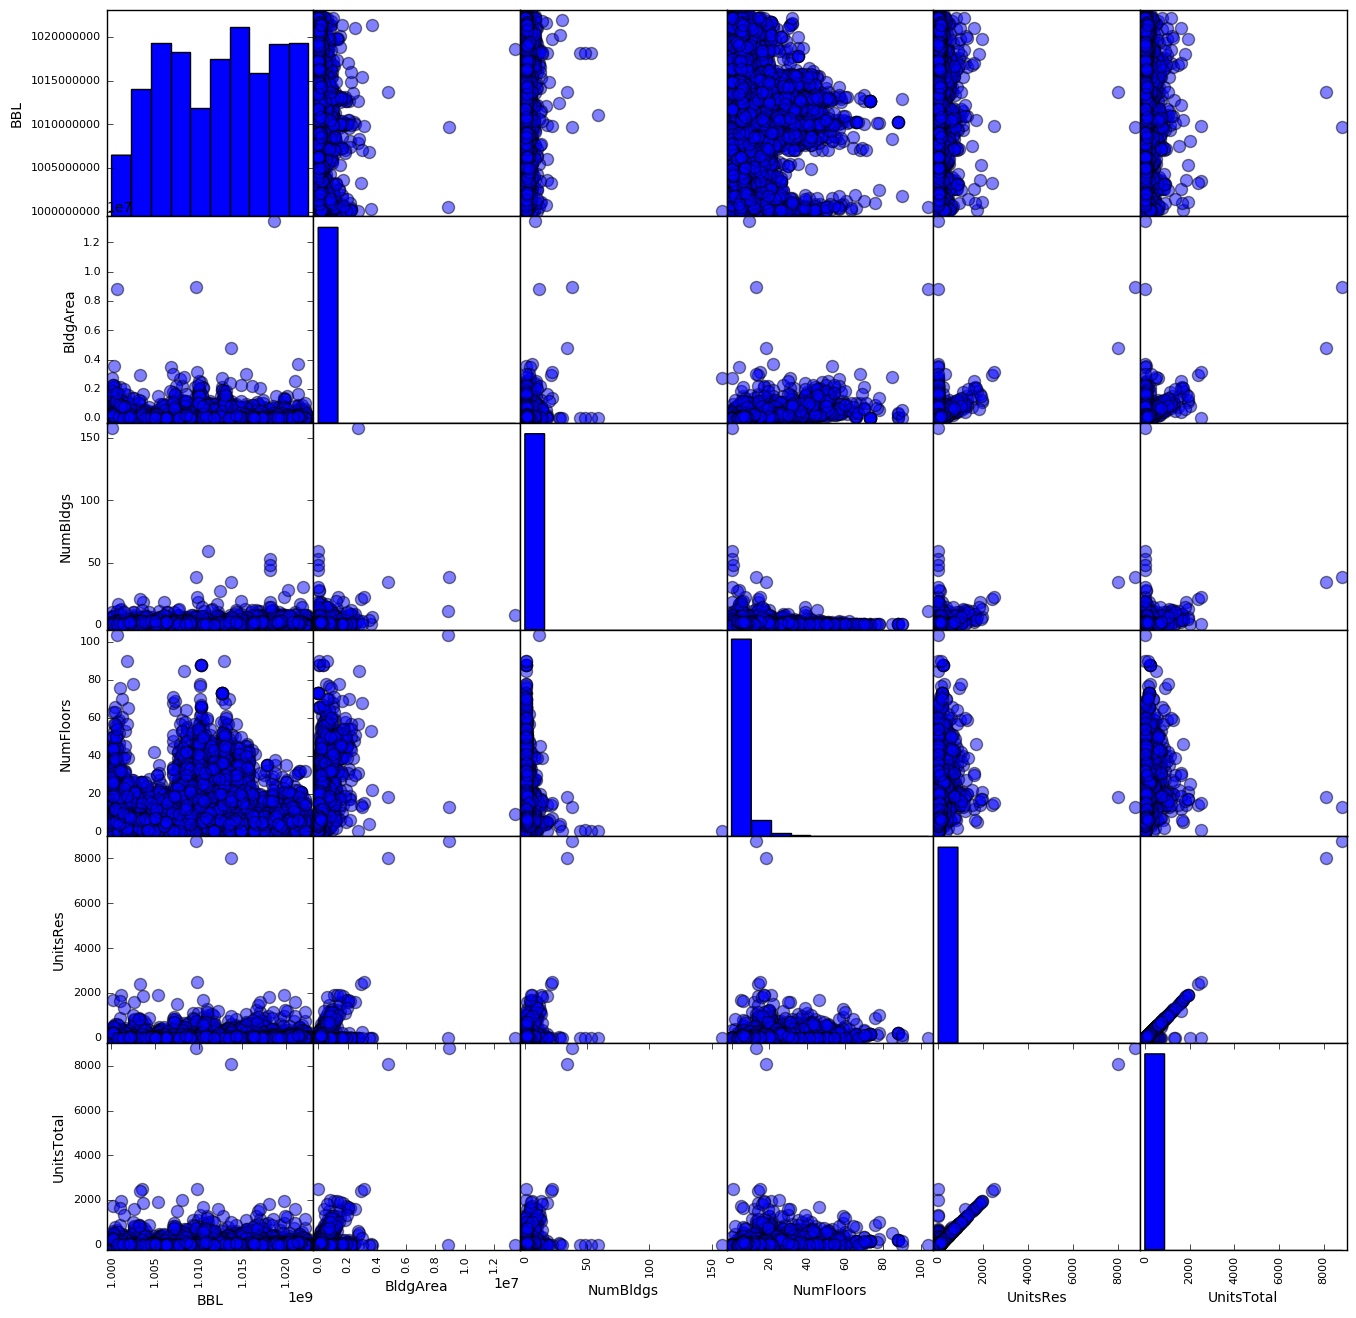

In [101]:
scatter_matrix(bsize, s=300, figsize=(16, 16))
pl.show()

#### Figure 3: scatter matrix of the buildings data plots all columns.

In [102]:
# Taking out the buildings where UnitsTotal = 0 
bsize = bsize[bsize.UnitsTotal > 0]
bsize = bsize[bsize.UnitsRes > 0]
bsize.describe()

,BBL,BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal
count,3.221700e+04,3.221700e+04,32217.000000,32217.000000,32217.000000,32217.000000
mean,1.012633e+09,3.102952e+04,1.119099,6.017514,28.694012,29.834342
std,6.042842e+06,1.060236e+05,0.724368,5.413949,101.894463,103.038301
min,1.000070e+09,0.000000e+00,0.000000,0.000000,1.000000,1.000000
25%,1.007200e+09,4.680000e+03,1.000000,4.000000,4.000000,4.000000
50%,1.013440e+09,8.700000e+03,1.000000,5.000000,10.000000,10.000000
75%,1.018200e+09,1.927000e+04,1.000000,6.000000,22.000000,24.000000
max,1.022500e+09,8.942176e+06,38.000000,90.000000,8759.000000,8805.000000


# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [103]:
# prepare your BBL columns
nrg.rename(columns={"nyc_borough_block_and_lot_bbl": "BBL", "reported_property_floor_area_building_s_ft": "area_ft2"}, inplace = True)

#merge
bblnrgdata = pd.merge(bsize, nrg, on='BBL')
bblnrgdata.describe()

,BBL,BldgArea,NumBldgs,NumFloors,UnitsRes,UnitsTotal,area_ft2,site_eui_kbtu_ft2,tot_nrg
count,3.515000e+03,3.515000e+03,3515.000000,3515.000000,3515.000000,3515.000000,3.515000e+03,3515.000000,3.515000e+03
mean,1.013104e+09,1.708320e+05,1.315789,15.096728,143.653770,147.240967,1.752046e+05,482.907397,1.037855e+08
std,5.552857e+06,2.733387e+05,1.625028,9.667194,296.857288,299.587395,2.690008e+05,5045.001000,1.258904e+09
min,1.000078e+09,3.911000e+03,1.000000,2.000000,1.000000,1.000000,1.000000e+04,0.100000,5.344000e+03
25%,1.009084e+09,6.493950e+04,1.000000,8.000000,52.000000,53.500000,6.967400e+04,66.750000,5.699647e+06
50%,1.013658e+09,1.020680e+05,1.000000,13.000000,83.000000,86.000000,1.072220e+05,82.500000,8.505938e+06
75%,1.016720e+09,1.851335e+05,1.000000,18.000000,157.000000,160.500000,1.910210e+05,100.400000,1.540269e+07
max,1.022500e+09,8.942176e+06,38.000000,78.000000,8759.000000,8805.000000,9.515627e+06,106472.700000,3.192713e+10


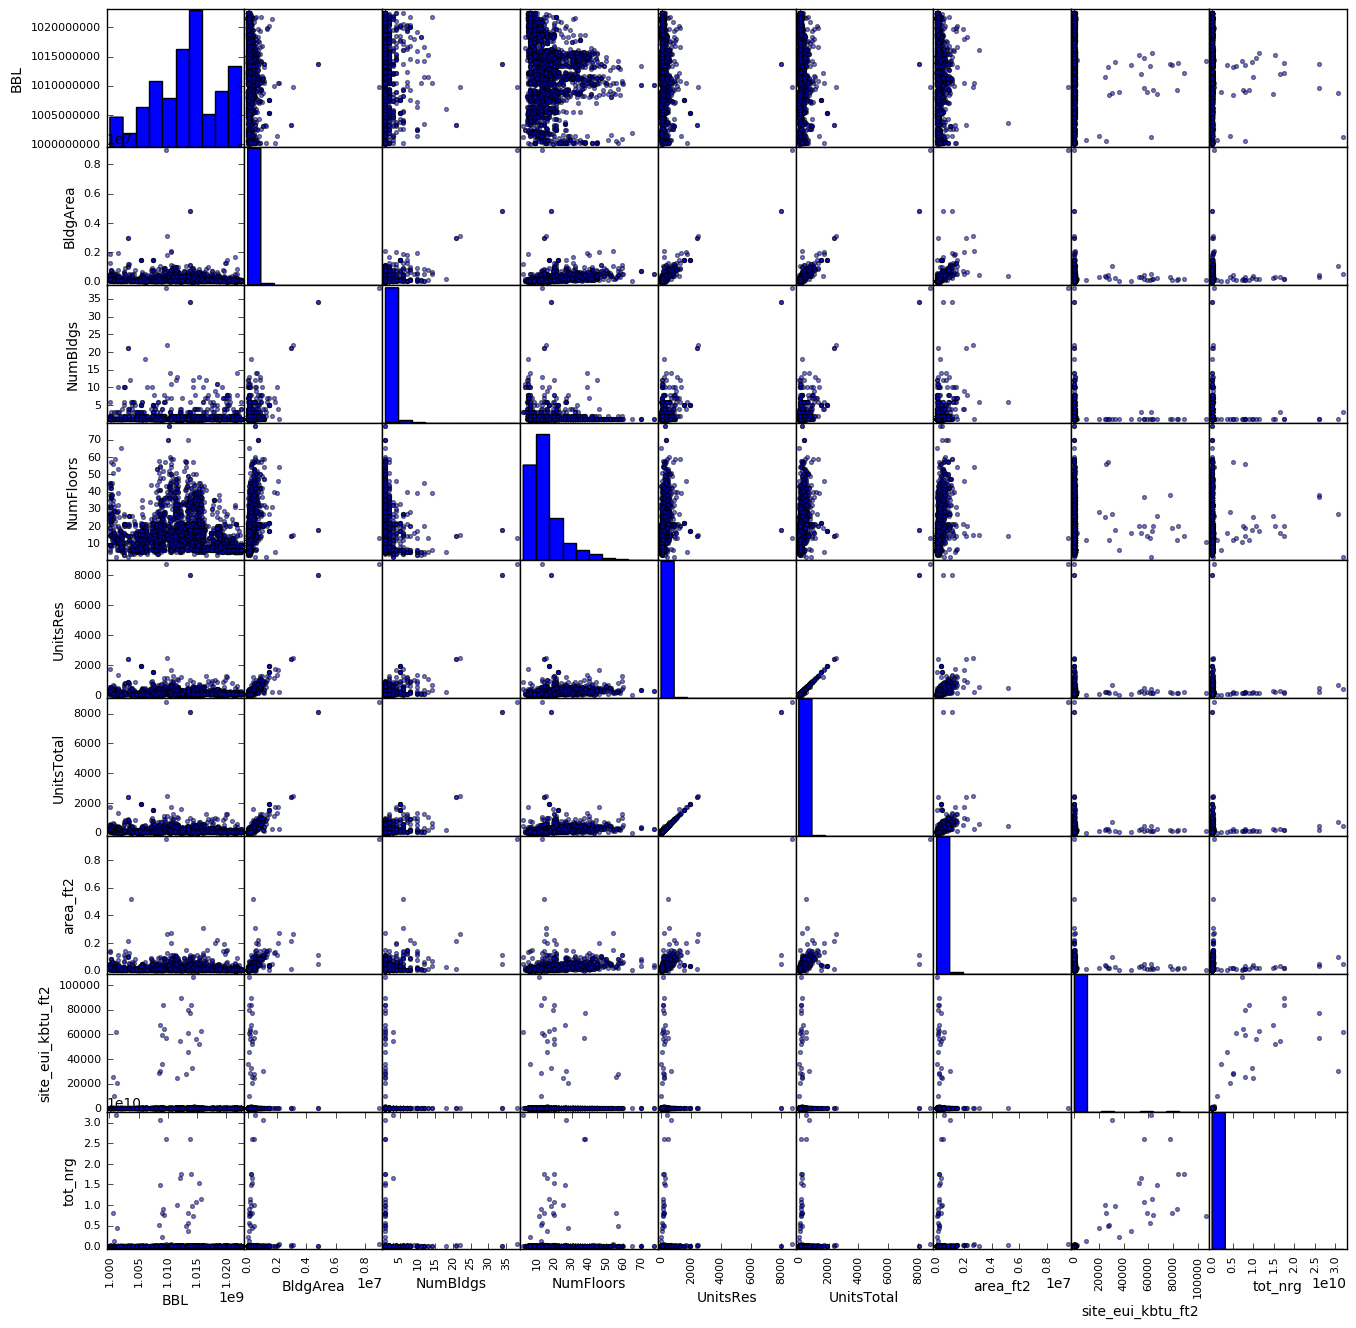

In [104]:
# Now the scatter matrix plot shows more columns.
scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))
pl.show()

#### Figure 4: Scatter matrix of the merged data.

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

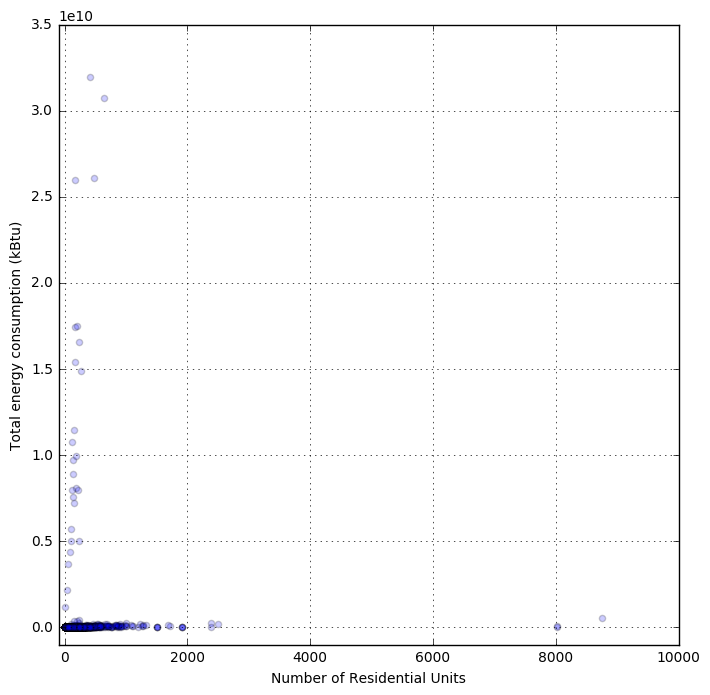

In [105]:
pl.figure(figsize=(8, 8))
pl.scatter(bblnrgdata.UnitsRes , bblnrgdata.tot_nrg, alpha=0.2)
pl.xlabel('Number of Residential Units')
pl.ylabel('Total energy consumption (kBtu)')
pl.xlim(-100, 10000)
pl.ylim(-1e9, 3.5e10)
pl.grid()

#### Figure 5: Scatter plot comparing the energy consumption from a building with its number of residential units. 

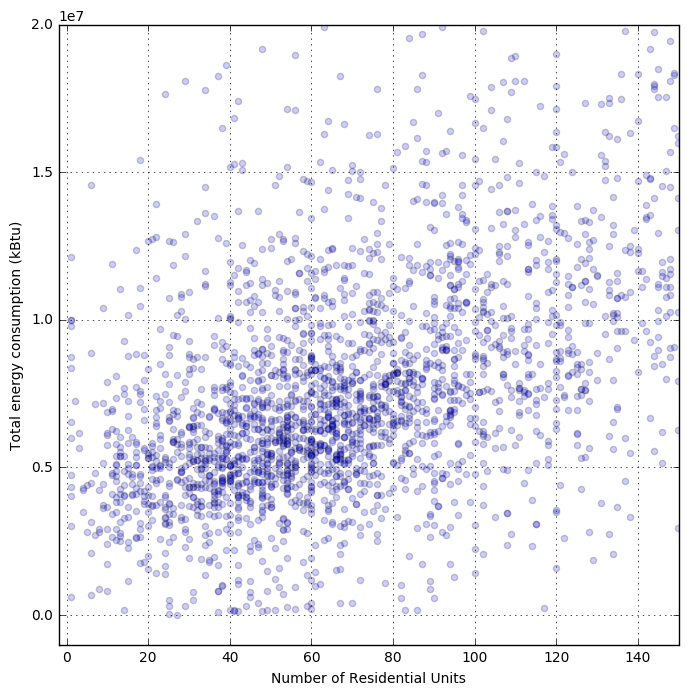

In [106]:
# zoomed in scatter plot
pl.figure(figsize=(8, 8))
pl.scatter(bblnrgdata.UnitsRes , bblnrgdata.tot_nrg, alpha=0.2)
pl.xlabel('Number of Residential Units')
pl.ylabel('Total energy consumption (kBtu)')
pl.xlim(-2, 150)
pl.ylim(-1e6, 2e7)
pl.grid()

#### Figure 6: Zoomed in version of the previous plot, where we can have a better visualization of the distribution.

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



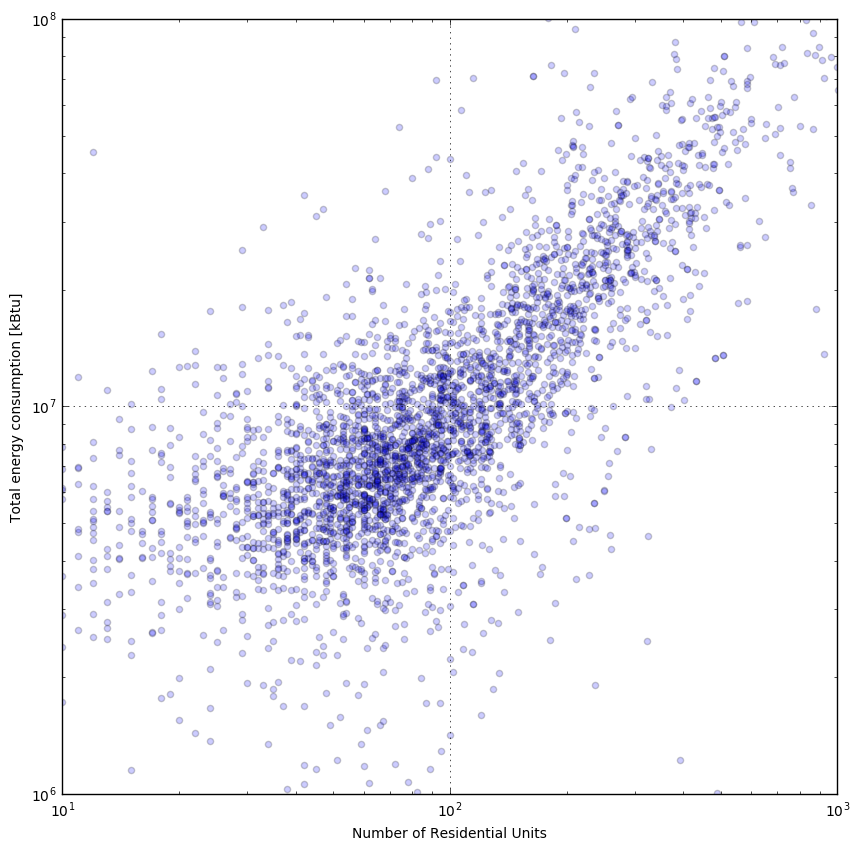

In [107]:
#log plot
bblnrgdata.plot.scatter('UnitsRes' , 'tot_nrg', loglog = True, alpha=0.2, figsize=(10, 10))
pl.xlabel('Number of Residential Units')
pl.ylabel('Total energy consumption [kBtu]')
pl.xlim(10, 1e3)
pl.ylim(1e6, 1e8)
pl.grid()

#### Figure 7: Log x log plot of the total energy consumption of a building versus its number of residential units. Zoomed in to show a pattern that indicates correlation between the two variables.

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [108]:
# X = sm.add_constant(np.log10(x))
# linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires where x or y is NaN

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



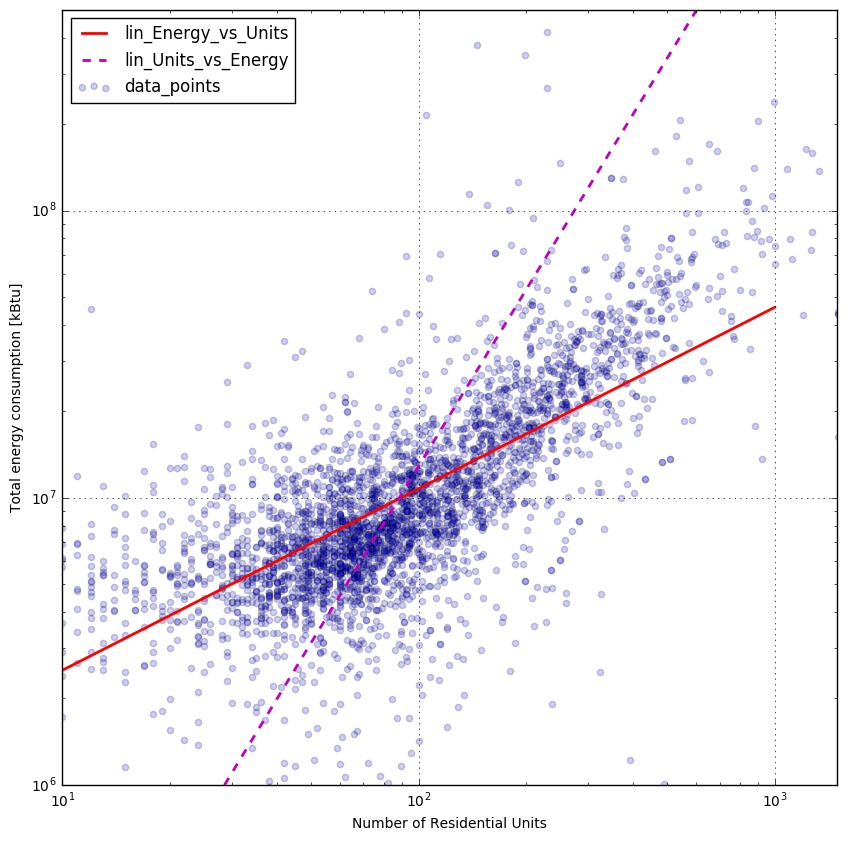

In [120]:
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)

x = bblnrgdata.UnitsRes
y = bblnrgdata.tot_nrg

X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit()

x = bblnrgdata.tot_nrg
y = bblnrgdata.UnitsRes

X = sm.add_constant(np.log10(x))
linmodel_rev = sm.OLS(np.log10(y), X, missing='drop').fit()

bblnrgdata.plot.scatter('UnitsRes' , 'tot_nrg', loglog = True, alpha=0.2, figsize=(10, 10), label = 'data_points')
interval = np.linspace(10, 1e3, 200) 
pred = (10**linmodel.params.const) * (interval ** linmodel.params.UnitsRes)
pred_rev = (interval/(10**linmodel_rev.params.const)) ** (1.0/linmodel_rev.params.tot_nrg)
pl.plot(interval, pred, 'r-', lw=2, label = 'lin_Energy_vs_Units')
pl.plot(interval, pred_rev, 'm--', lw=2, label = 'lin_Units_vs_Energy')
pl.xlabel('Number of Residential Units')
pl.ylabel('Total energy consumption [kBtu]')
pl.xlim(10, 1.5e3)
pl.ylim(1e6, 5e8)
pl.grid()
pl.legend(loc='upper left')

#### Figure 8: Comparison of the two alternatives of linear fit through the log vs log plot (Energy vs Units and Units vs Energy) showing that the Energy vs Units gets a much better fit through the data. 

In [128]:
def evalChisq(datax, datay, fun):
    chisq = sum((fun(datax) - datay)**2 / ((sqrt(datay)/(datay*np.log(10)))**2)) 
    return chisq

In [124]:
def f1(x):
    return (10**linmodel.params.const) * (x ** linmodel.params.UnitsRes)

In [125]:
def f2(x):
    return (x/(10**linmodel_rev.params.const)) ** (1.0/linmodel_rev.params.tot_nrg)

In [129]:
evalChisq(bblnrgdata.tot_nrg, bblnrgdata.UnitsRes, f1)

8.5594269526948411e+28

In [130]:
evalChisq(bblnrgdata.tot_nrg, bblnrgdata.UnitsRes, f2)

5.0569523577891835e+52

In [115]:
# OLS summary Energy vs Units 
linmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tot_nrg   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1581.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          9.01e-286
Time:                        13:28:48   Log-Likelihood:                -1667.7
No. Observations:                3515   AIC:                             3339.
Df Residuals:                    3513   BIC:                             3352.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.7675      0.032    182.556      0.000         5.706     5.829
UnitsRes       0.6319      0.016     39.759      0.000         0.601     0.663
==============================================================================
Omnibus:                     2163.394   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87013.921
Skew:                           2.320   Prob(JB):                         0.00
Kurtosis:                      26.929   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
# OLS summary Units vs Energy 
linmodel_rev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               UnitsRes   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1581.
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          9.01e-286
Time:                        13:49:54   Log-Likelihood:                -1224.5
No. Observations:                3515   AIC:                             2453.
Df Residuals:                    3513   BIC:                             2465.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.4913      0.087    -17.220      0.000        -1.661    -1.322
tot_nrg        0.4911      0.012     39.759      0.000         0.467     0.515
==============================================================================
Omnibus:                      991.864   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7736.494
Skew:                          -1.123   Prob(JB):                         0.00
Kurtosis:                       9.912   Cond. No.                         107.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we can see from the chi-square test and from the Log-likelihood, the fit of Energy vs Units generates a better model than the fit of Units vs Energy. That occurs because the variance on Units is higher than the variance on Energy, which makes more effective to fit a linear model on Energy vs Units. And that also makes more sense considering that the purpose of the model is to predict Energy consumption from the Units count.  

In [149]:
# fitting a polinomial of second degree on log(Energy) vs log(Units)
df_curve = pd.concat([np.log10(bblnrgdata.tot_nrg), np.log10(bblnrgdata.UnitsRes)], axis=1) 
df_curve.rename(columns={'tot_nrg' : 'y', 'UnitsRes' : 'x'}, inplace = True)
df_curve['x2'] = df_curve.x**2

df_curve.head()


,y,x,x2
0,6.818522,1.698970,2.886499
1,7.257459,1.462398,2.138608
2,6.870987,1.857332,3.449684
3,6.977341,2.029384,4.118399
4,6.748622,2.127105,4.524575


In [152]:
curvemodel = smf.ols(formula= 'y ~ x2 + x', data = df_curve).fit()
curvemodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     964.5
Date:                Tue, 18 Oct 2016   Prob (F-statistic):               0.00
Time:                        15:13:47   Log-Likelihood:                -1551.3
No. Observations:                3515   AIC:                             3109.
Df Residuals:                    3512   BIC:                             3127.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7114      0.068     98.531      0.000         6.578     6.845
x2             0.2747      0.018     15.507      0.000         0.240     0.309
x             -0.4117      0.069     -5.963      0.000        -0.547    -0.276
==============================================================================
Omnibus:                     2114.105   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           107537.723
Skew:                           2.166   Prob(JB):                         0.00
Kurtosis:                      29.749   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

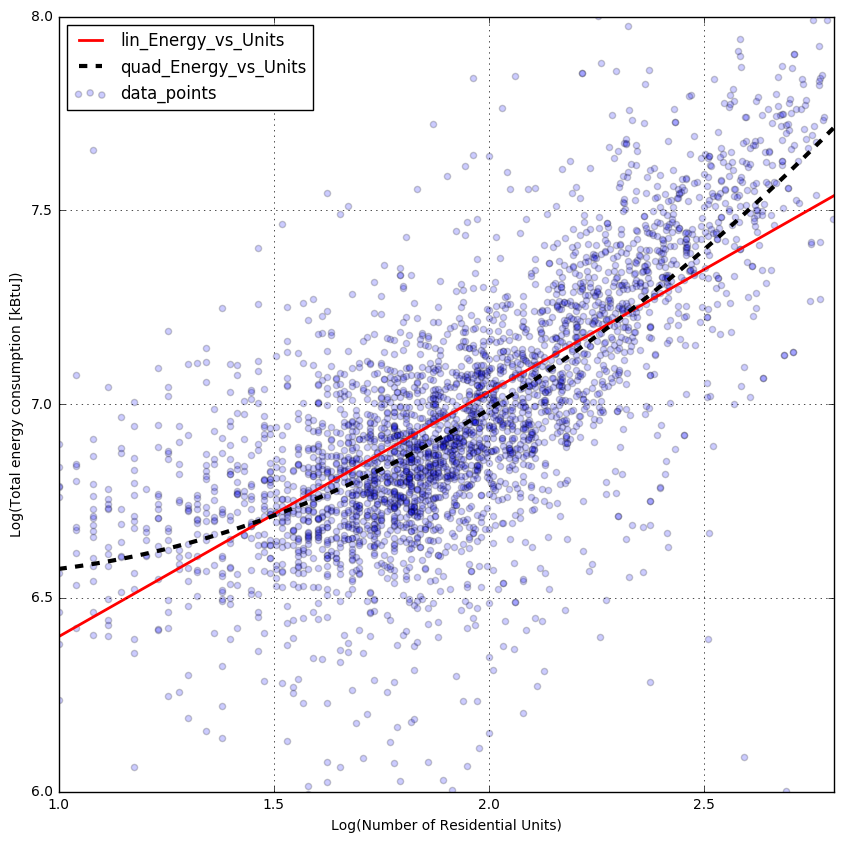

In [166]:
x = df_curve.x
y = df_curve.y

X = sm.add_constant(x)
linmodel = sm.OLS(y, X, missing='drop').fit()


df_curve.plot.scatter('x' , 'y', alpha=0.2, figsize=(10, 10), label = 'data_points')
interval = np.linspace(1, 3, 200) 
pred = linmodel.params.const + linmodel.params.x * interval
pred_quad = curvemodel.params.Intercept + curvemodel.params.x * interval + curvemodel.params.x2 * interval**2
pl.plot(interval, pred, 'r-', lw=2, label = 'lin_Energy_vs_Units')
pl.plot(interval, pred_quad, 'k--', lw=3, label = 'quad_Energy_vs_Units')
pl.xlabel('Log(Number of Residential Units)')
pl.ylabel('Log(Total energy consumption [kBtu])')
pl.xlim(1, 2.8)
pl.ylim(6, 8)
pl.grid()
pl.legend(loc='upper left')

#### Figure 9: Comparison of the linear fit through the log (Energy) vs log(Units). 

In [170]:
print ("LR : ", -2 * (linmodel.llf - curvemodel.llf))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linmodel))

LR :  232.783303047
LR from statsmodels: (232.78330304728388, 1.4735542062812013e-52, 1.0)


The Likelyhood Ratio indicates that the second degree polinomial (alternative model) provides a better fit to the data than the linear model (null model). This conclusion is reinforced by extremely low p-value, which would maintain this conclusion equally with a significance level of $\alpha = 0.05$ , $\alpha = 0.01$ ,  or even lower than that.   

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [117]:
# pl.figure(figsize=(10,10))
# pl.title ("log likelihood surface", fontsize = 22)
# pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
# pl.xlabel('slope', fontsize = 22)
# pl.ylabel('intercept', fontsize = 22)
# pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

In [118]:
# bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

# bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
#                 fontsize=22, colormap='gist_rainbow', alpha = 1, 
#                 marker='o',  figsize=(16, 14), loglog=True,  
#                 xlim=(1000,1e11), ylim=(1,1000), 
#                 c=bblnrgdata['YearBuilt']-1900, 
#                 s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
# pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
# pl.ylabel("total number of units", fontsize=22)
# pl.xlabel("total energy consumption (kBtu)", fontsize=22)